# Board Level Strategic Insight Request
## Data Analyst: Riza June Espino
## Date of Request: September 26, 2025

Scenario

A mid-sized financial institution has been actively expanding its personal loan portfolio. However, recent shifts in customer behavior and credit risk profiles have prompted the Board of Directors to revisit the underlying factors influencing loan approvals and amounts granted. The board is particularly concerned with credit risk, profitability, and data-driven decision-making.

During a quarterly strategy meeting, the Chief Risk Officer (CRO) presents a dashboard highlighting inconsistencies in the average loan amounts issued across customer segments. Some applicants with moderate income and lower credit scores are receiving higher-than-expected loan amounts, while more qualified applicants appear to be under-leveraged.

In response, the Chairperson of the Board raises a crucial question:

"Among all the customer attributes we’ve been collecting—like income, credit score, employment history, age, debt-to-income ratio, and education level—can we clearly identify which of these factors have the strongest statistical relationship with the loan amount issued?"

The board mandates the Data Analytics Team to conduct an immediate correlation analysis to:

1. Identify which factors most strongly drive loan amounts.

2. Distinguish between statistically significant vs. insignificant variables.

3. Support future decisions about automating loan approvals, tightening risk thresholds, or tailoring products to specific customer profiles.

Create a Business Analytics Report that address the request of the board.

In [10]:
%pip install qdesc
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd

In [12]:
df=pd.read_excel('HypotheticalLoansData.xlsx')
df

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29
...,...,...,...,...,...,...,...
495,68083.65,685.94,23,0.31,58,High School,82016.95
496,44441.31,789.88,25,0.34,31,Bachelor,101933.38
497,57144.92,732.04,24,0.22,55,High School,91180.47
498,46865.73,671.44,28,0.42,28,Bachelor,89112.09


In [ ]:
df.head(6)

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29
5,56487.95,675.64,28,0.24,21,Master,80524.89


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           500 non-null    float64
 1   CreditScore      500 non-null    float64
 2   EmploymentYears  500 non-null    int64  
 3   DebtToIncome     500 non-null    float64
 4   Age              500 non-null    int64  
 5   EducationLevel   500 non-null    object 
 6   LoanAmount       500 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB


In [13]:
qd.desc(df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Income,500.0,60102.57,14718.80,60191.96,9996.96,11380.99,117790.97,0.30,0.78
CreditScore,500.0,701.59,48.90,701.43,31.18,565.16,831.62,0.23,0.78
EmploymentYears,500.0,14.31,8.52,14.00,7.00,0.00,29.00,5.22,0.78
DebtToIncome,500.0,0.30,0.10,0.30,0.07,0.01,0.57,0.43,0.78
Age,500.0,42.54,12.71,42.50,11.50,21.00,64.00,6.43,0.78
LoanAmount,500.0,87561.53,13021.30,87579.97,9308.11,53960.78,119076.87,0.28,0.78


Income: Mean = 60,102.57; Median = 60,191.96; SD = 14,718.80. Distribution is approximately normal.

CreditScore: Mean = 701.59; Median = 701.43; SD = 48.90. Distribution is approximately normal.

EmploymentYears: Mean = 14.31; Median = 14.00; SD = 7.00. Not normally distributed.
-Anderson-Darling Statistic : 5.2192
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null

DebtToIncome: Mean = 0.30; Median = 0.30; SD = 0.10. Approximately normal.

Age: Mean = 42.54; Median = 42.50; SD = 12.71. Not normally distributed.
---- Variable: Age ---
  Anderson-Darling Statistic : 6.4294
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null

LoanAmount: Mean = 87,561.53; Median = 87,579.97; SD = 13,021.30. Approximately normal.

## Frequency distributions (histograms) confirmed unimodal shapes for Income, Credit Score, Debt-to-Income, and Loan Amount, while EmploymentYears and Age were more variable. Boxplots identified outliers at extreme low and high values for Income, Credit Score and Debt to Income.


--- Variable: Income ---
  Anderson-Darling Statistic : 0.2978
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


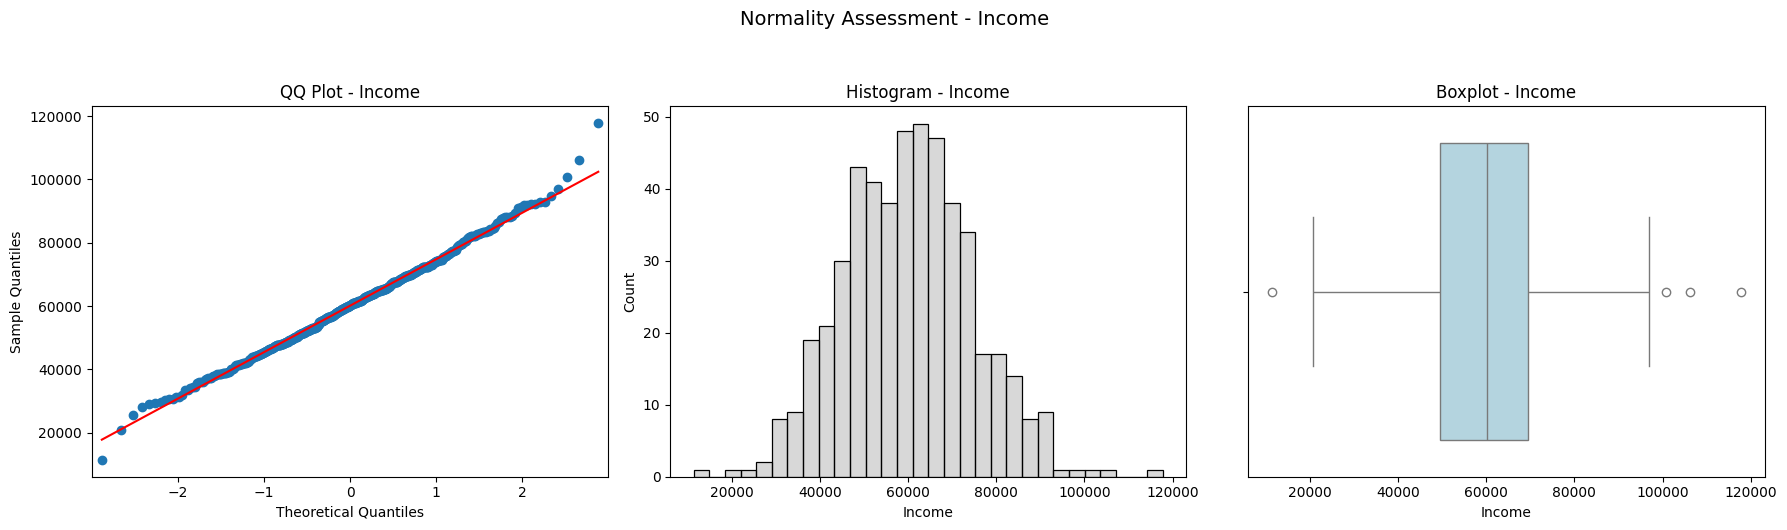


--- Variable: CreditScore ---
  Anderson-Darling Statistic : 0.2349
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


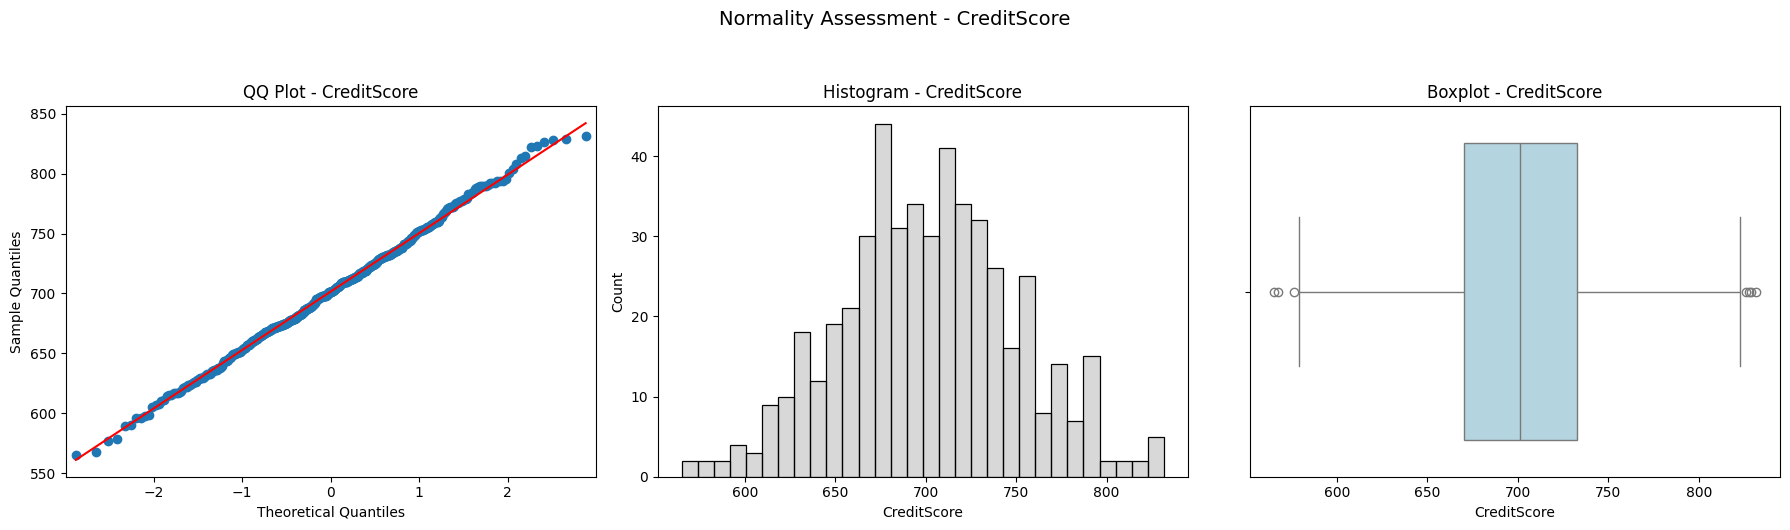


--- Variable: EmploymentYears ---
  Anderson-Darling Statistic : 5.2192
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null


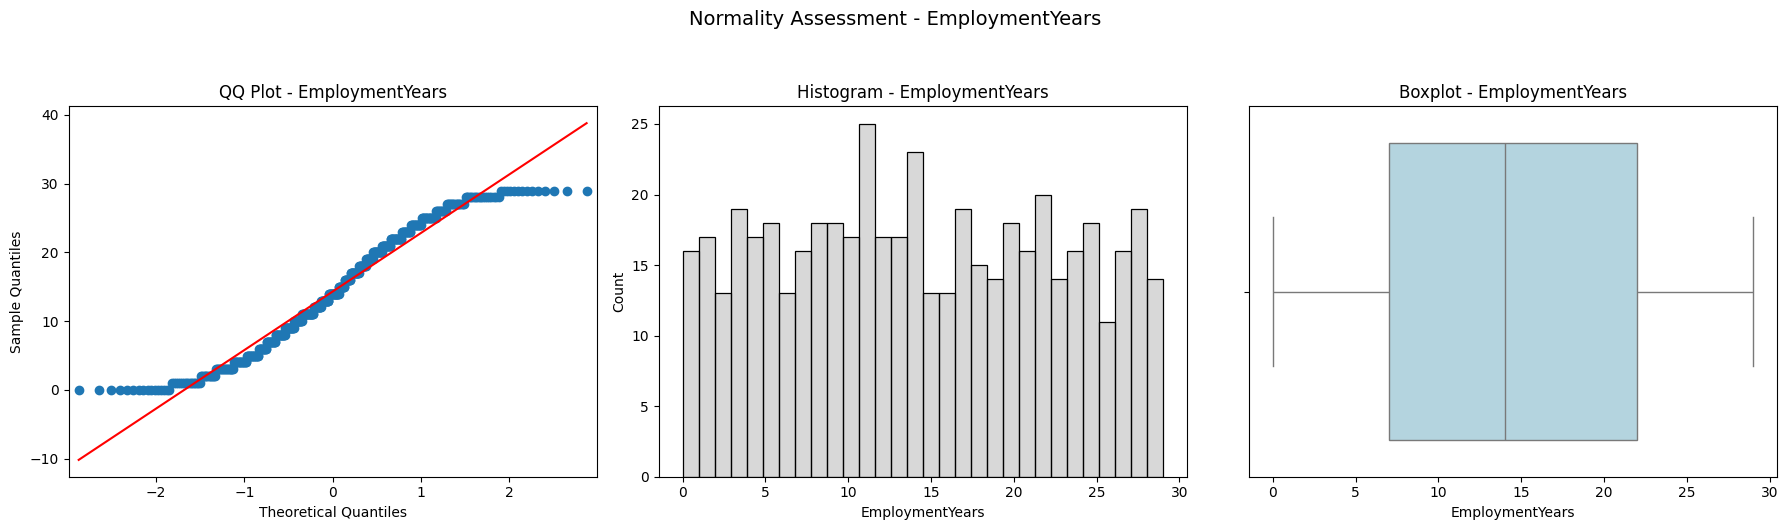


--- Variable: DebtToIncome ---
  Anderson-Darling Statistic : 0.4250
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


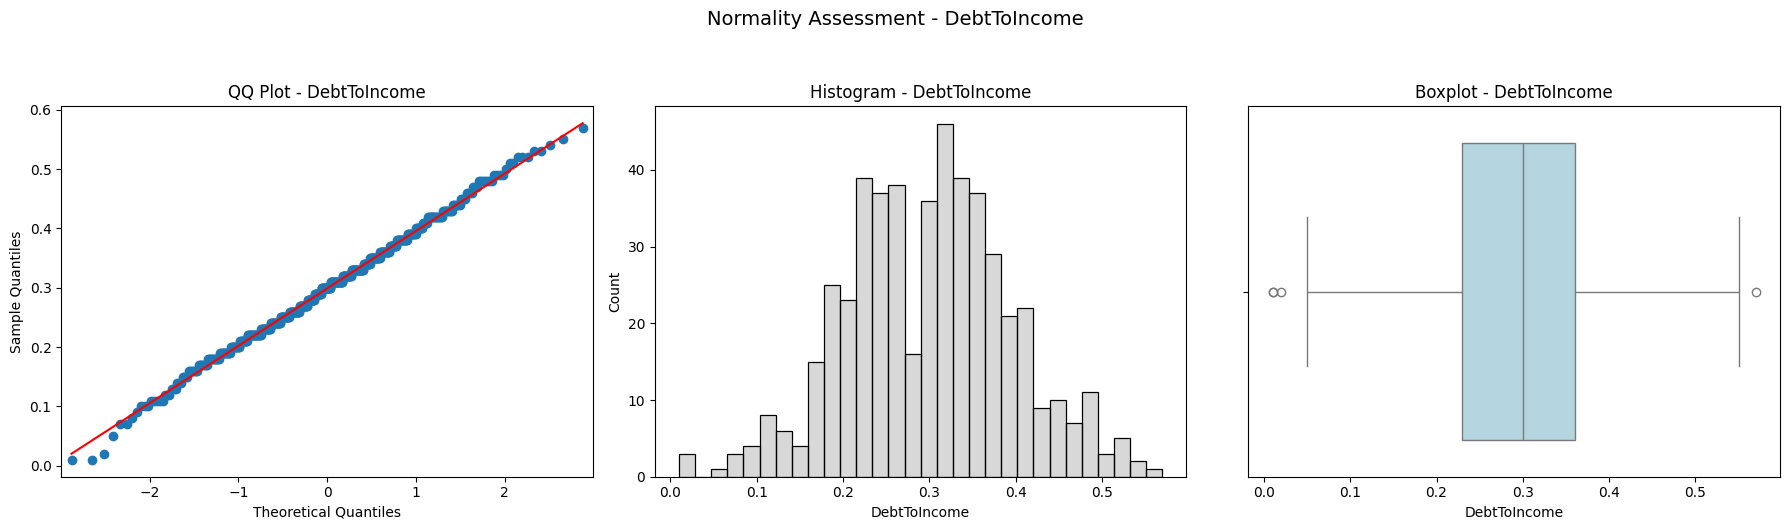


--- Variable: Age ---
  Anderson-Darling Statistic : 6.4294
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null


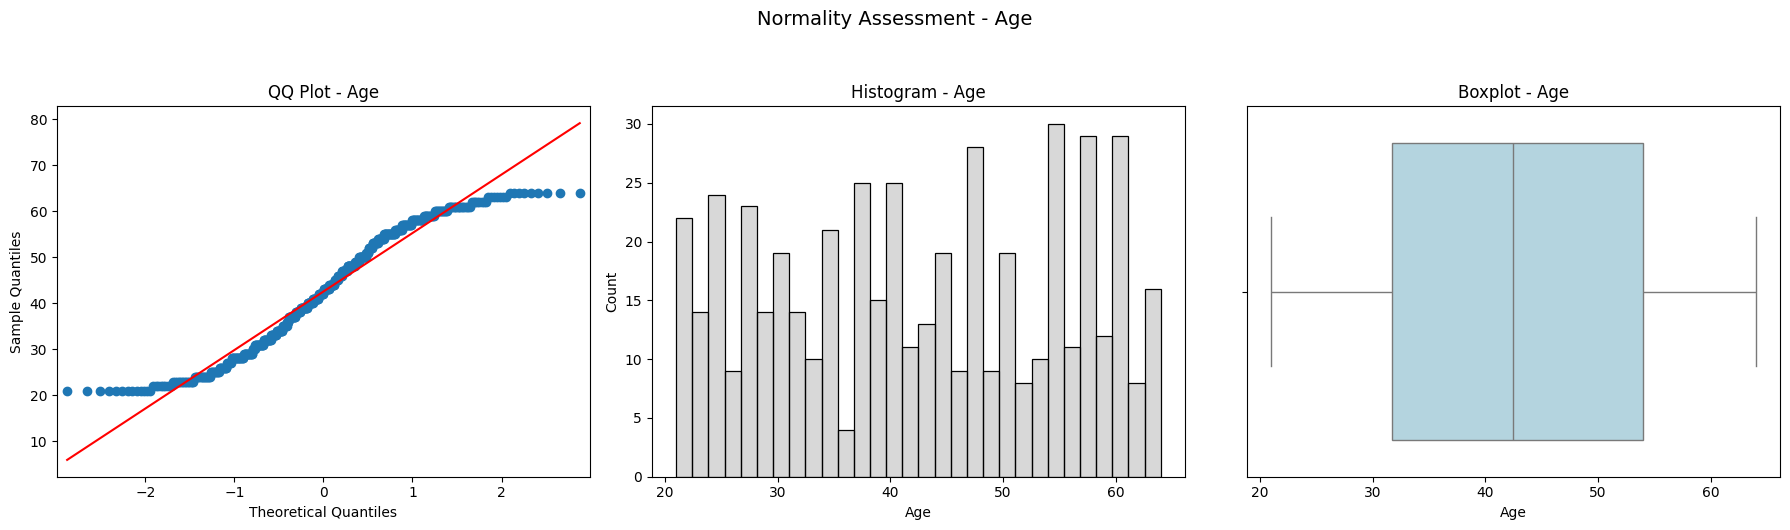


--- Variable: LoanAmount ---
  Anderson-Darling Statistic : 0.2794
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


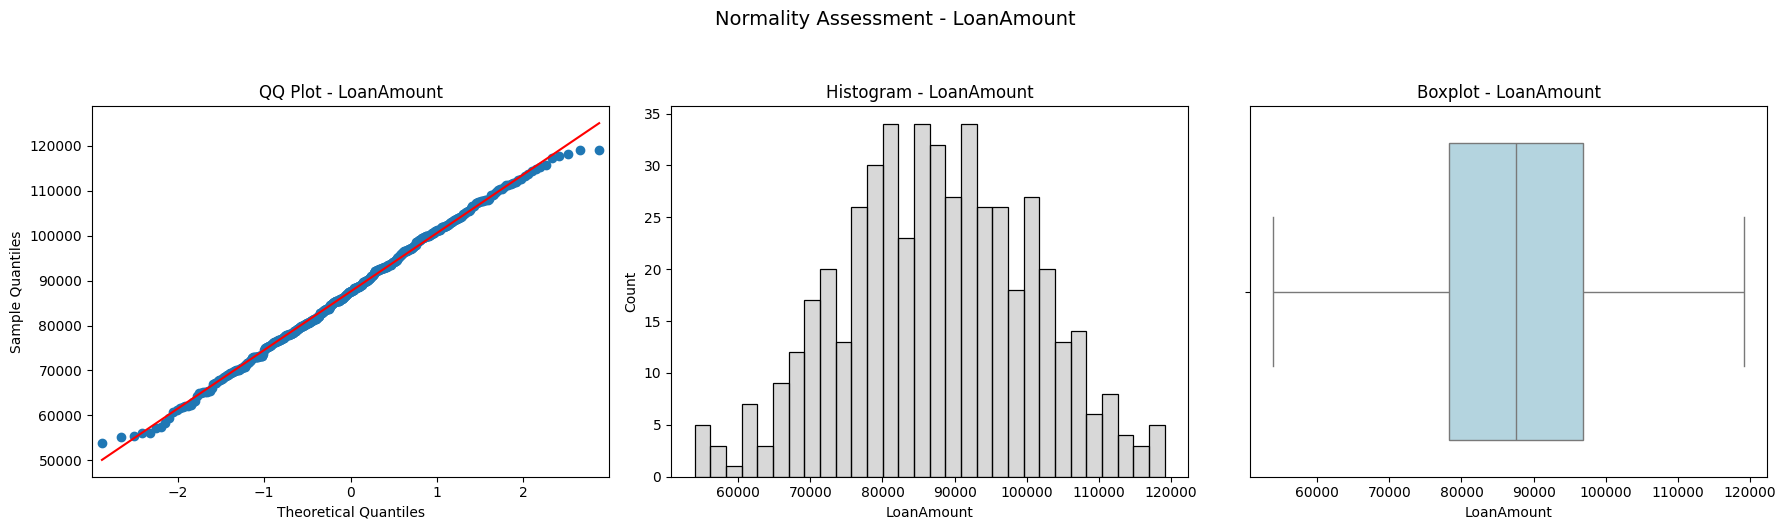

In [18]:
qd.normcheck_dashboard(df)

In [36]:
spearman_corr, spearman_p = stats.spearmanr(df['Income'], df['LoanAmount'])
print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

Spearman correlation coefficient: 0.2261, p-value: 0.0000


# Income vs LoanAmount
Spearman correlation coefficient: 0.2261, p-value: 0.0000

Moderate positive correlation. Higher income applicants generally receive higher loan amounts.


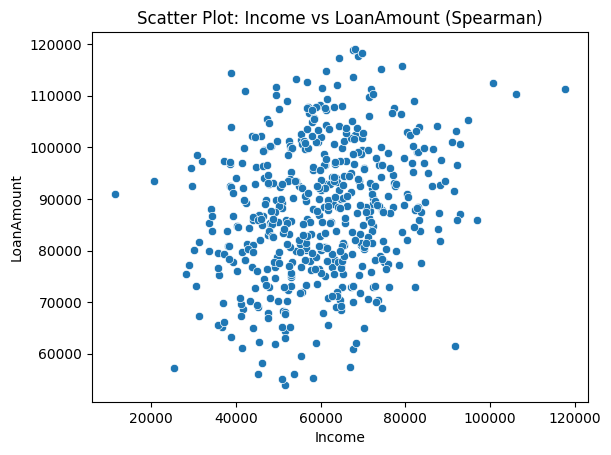

In [37]:
sns.scatterplot(x=df['Income'], y=df['LoanAmount'])
plt.title('Scatter Plot: Income vs LoanAmount (Spearman)')
plt.show()

In [38]:
pearson_corr, pearson_p = stats.pearsonr(df['CreditScore'], df['LoanAmount'])
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

Pearson correlation coefficient: 0.3440, p-value: 0.0000


# Pearson correlation coefficient: 0.3440, p-value: 0.0000
Moderate positive correlation. Applicants with higher credit scores are more likely to be granted larger loans.

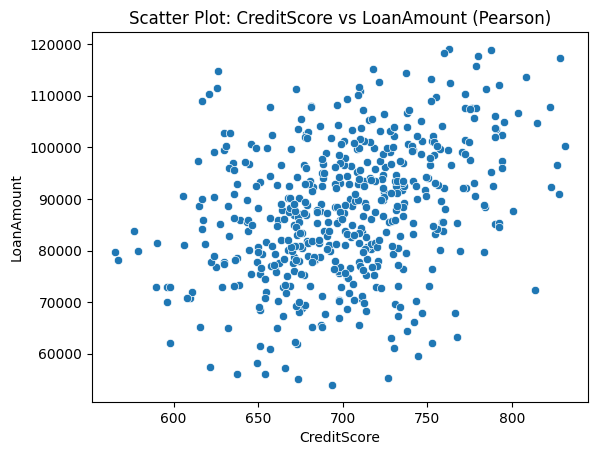

In [39]:
sns.scatterplot(x=df['CreditScore'], y=df['LoanAmount'])
plt.title('Scatter Plot: CreditScore vs LoanAmount (Pearson)')
plt.show()

In [25]:
kendall_corr, kendall_p = stats.kendalltau(df['EmploymentYears'], df['LoanAmount'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: 0.2045, p-value: 0.0000


# EmploymentYears vs LoanAmount
Kendall's Tau-b correlation coefficient: 0.2045, p-value: 0.0000

Weak positive correlation. Longer employment histories are only slightly associated with larger loan amounts. Employment stability has limited influence compared to income and credit score, and should be considered a supplementary factor.

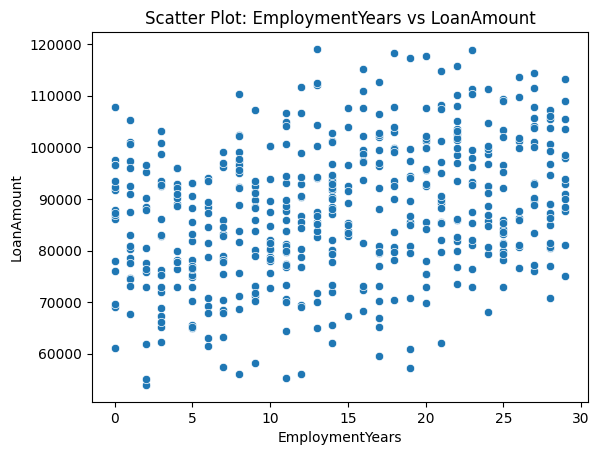

In [28]:
sns.scatterplot(x=df['EmploymentYears'], y=df['LoanAmount'])
plt.title('Scatter Plot: EmploymentYears vs LoanAmount')
plt.show()

### Conclusions:
*   Most influential drivers: Income and Credit Score (moderate correlations).
*  Weaker but significant: EmploymentYears.
*  Less relevant: DebtToIncome and Age.


### Recommendations:
*  Automate loan approvals using Income and CreditScore thresholds to ensure consistent decisions.
*   Tighten risk controls for moderate-income, low-credit applicants who are currently over-leveraged.

*   Use EmploymentYears as a supplementary factor for risk adjustments, not a primary driver.
*   Continue monitoring Age and Debt-to-Income ratios, but treat them as background variables.

## This analysis confirms that Income and Credit Score are the strongest drivers of Loan Amount. Lending policies should emphasize these attributes to improve profitability, reduce risk, and enable scalable automation.



